## 1.2 神经网络的训练
### 1.2.1 损失函数

损失函数（Loss Function），也称为代价函数（Cost Function）或误差函数（Error Function），在机器学习和数学优化中扮演着至关重要的角色。它是一种衡量模型预测值与真实值之间差异的度量方式。简单来说，损失函数量化了给定模型对观测数据的拟合程度——模型预测的结果与实际观察结果之间的差距越大，损失函数的值就越高。
常见的损失函数：均方误差、交叉熵损失

#### 损失函数的作用

1. **评估模型性能**：损失函数提供了一种方法来评估机器学习模型的预测准确性。通过最小化损失函数，我们可以找到最能准确反映输入数据与输出标签之间关系的模型参数。

2. **指导模型训练**：在监督学习过程中，损失函数用于指导梯度下降等优化算法更新模型参数的方向和幅度，以便逐步减少预测误差，提高模型性能。

#### 均方误差（Mean Squared Error, MSE）：
常用于回归问题，计算每个样本预测值$\hat{y}_i$与真实值$y_i$差的平方的平均值。
  $$ \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$
  
#### 交叉熵损失（Cross-Entropy Loss）：
交叉熵（Cross-Entropy）是信息论中的一个重要概念，广泛应用于机器学习和深度学习中的分类任务。交叉熵损失（Cross-Entropy Loss）是衡量模型预测概率分布与真实概率分布之间差异的常用损失函数。

##### 熵（Entropy）
熵是衡量随机变量不确定性的指标，表示一个概率分布的不确定性或信息量。

**（1）定义**
对于一个离散随机变量 $X$，其概率分布为 $P(x)$，熵 $H(X)$ 定义为：

$$H(X) = -\sum_{x \in X} P(x) \log P(x)$$

对于连续随机变量，熵的定义为：

$$H(X) = -\int_{x \in X} p(x) \log p(x) \, dx$$

**（2）性质**
- 熵越大，表示随机变量的不确定性越高。
- 熵的最小值为 0，当且仅当随机变量是确定的（即某个事件的概率为 1，其余为 0）。
- 熵的最大值为 $ \log N $，其中 $ N $ 是随机变量的可能取值数量，当且仅当所有事件的概率相等时达到最大值。

**（3）示例**
假设有一个离散随机变量 $ X $，其概率分布为 $ P = [0.5, 0.5] $，则熵为：

$$
H(X) = -(0.5 \log 0.5 + 0.5 \log 0.5) = -\log 0.5 \approx 0.693
$$

##### 交叉熵（Cross-Entropy）
交叉熵用于衡量两个概率分布 $ P $ 和 $ Q $ 之间的差异，通常用于机器学习中的损失函数。

**（1）定义**
对于两个概率分布 $ P $ 和 $ Q $，交叉熵 $ H(P, Q) $ 定义为：

$$
H(P, Q) = -\sum_{x \in X} P(x) \log Q(x)
$$

对于连续随机变量，交叉熵的定义为：

$$
H(P, Q) = -\int_{x \in X} p(x) \log q(x) \, dx
$$

**（2）性质**
- 交叉熵越小，表示 $ Q $ 越接近 $ P $。
- 当 $ Q = P $ 时，交叉熵等于熵，即 $ H(P, Q) = H(P) $。

**（3）示例**
假设真实分布 $ P = [1, 0] $，预测分布 $ Q = [0.8, 0.2] $，则交叉熵为：

$$
H(P, Q) = -(1 \cdot \log 0.8 + 0 \cdot \log 0.2) = -\log 0.8 \approx 0.2231
$$

如果预测分布 $ Q = [0.9, 0.8] $，则交叉熵为：

$$
H(P, Q) = -(1 \cdot \log 0.9 + 0 \cdot \log 0.8) = -\log 0.9 \approx 0.1053
$$


##### 散度（Divergence）
散度用于衡量两个概率分布之间的差异，常用的散度包括 KL 散度和 JS 散度。

**KL 散度（Kullback-Leibler Divergence）**
KL 散度衡量 $ Q $ 分布与 $ P $ 分布之间的差异。

**（1）定义**
对于两个概率分布 $ P $ 和 $ Q $，KL 散度 $ D_{KL}(P \parallel Q) $ 定义为：

$$
D_{KL}(P \parallel Q) = \sum_{x \in X} P(x) \log \frac{P(x)}{Q(x)}
$$

对于连续随机变量，KL 散度的定义为：

$$
D_{KL}(P \parallel Q) = \int_{x \in X} p(x) \log \frac{p(x)}{q(x)} \, dx
$$

**（2）性质**
- KL 散度是非负的，即 $ D_{KL}(P \parallel Q) \geq 0 $。
- 当且仅当 $ P = Q $ 时，KL 散度为 0。
- KL 散度不对称，即 $ D_{KL}(P \parallel Q) \neq D_{KL}(Q \parallel P) $。

**（3）示例**
假设真实分布 $ P = [1, 0] $，预测分布 $ Q = [0.8, 0.2] $，则 KL 散度为：

$$
D_{KL}(P \parallel Q) = 1 \cdot \log \frac{1}{0.8} + 0 \cdot \log \frac{0}{0.2} = \log 1.25 \approx 0.2231
$$

**JS散度（Jensen-Shannon Divergence）**
JS 散度是对称的散度，基于 KL 散度定义。

**（1）定义**
对于两个概率分布 $ P $ 和 $ Q $，JS 散度 $ D_{JS}(P \parallel Q) $ 定义为：

$$
D_{JS}(P \parallel Q) = \frac{1}{2} D_{KL}(P \parallel M) + \frac{1}{2} D_{KL}(Q \parallel M)
$$

其中，$ M = \frac{P + Q}{2} $ 是 $ P $ 和 $ Q $ 的平均分布。

**（2）性质**
- JS 散度是对称的，即 $ D_{JS}(P \parallel Q) = D_{JS}(Q \parallel P) $。
- JS 散度的取值范围为 $ [0, 1] $。

**（3）示例**
假设真实分布 $ P = [1, 0] $，预测分布 $ Q = [0.8, 0.2] $，则 JS 散度为：

- 计算平均分布 $ M $：
   $$
   M = \frac{P + Q}{2} = [0.9, 0.1]
   $$
- 计算 KL 散度：
   $$
   D_{KL}(P \parallel M) = 1 \cdot \log \frac{1}{0.9} + 0 \cdot \log \frac{0}{0.1} = \log \frac{1}{0.9} \approx 0.1054
   $$
   $$
   D_{KL}(Q \parallel M) = 0.8 \cdot \log \frac{0.8}{0.9} + 0.2 \cdot \log \frac{0.2}{0.1} \approx 0.8 \cdot (-0.1178) + 0.2 \cdot 0.6931 \approx 0.0364
   $$
- 计算 JS 散度：
   $$
   D_{JS}(P \parallel Q) = \frac{1}{2} (0.1054 + 0.0364) \approx 0.0709
   $$


**熵和交叉熵的关系**：交叉熵实际上可以视为熵加上额外的一个项，这个额外的项就是 KL散度。具体来说，对于两个分布 $P$ 和 $Q$，有 $H(P, Q) = H(P) + D_{KL}(P || Q)$。
**KL散度和交叉熵的关系**：在机器学习实践中，特别是在训练分类模型时，我们通常最小化的是交叉熵而非直接最小化KL散度。这是因为交叉熵可以直接从模型输出和真实标签计算得到，并且最小化交叉熵等价于最小化KL散度（当 $P$ 固定时）。


#### 机器学习中交叉熵损失的计算示例
在分类任务中，真实分布 $ P $ 通常是**one-hot编码**的形式，即真实类别对应的概率为 1，其他类别为 0。假设有 $ C $ 个类别，真实类别为 $ y $，模型预测的概率分布为 $ \hat{y} $，则交叉熵损失的计算步骤如下：

**（1）真实分布 $ P $**
真实分布 $ P $ 是一个 one-hot 向量，形式如下：

$$
P = [0, 0, \dots, 1, \dots, 0]
$$

其中，只有真实类别 $ y $ 对应的位置为 1，其余位置为 0。

**（2）预测分布 $ Q $**
模型输出的预测分布 $ Q $ 是一个概率向量，形式如下：

$$
Q = [q_1, q_2, \dots, q_C]
$$

其中，$ q_i $ 表示模型预测的第 $ i $ 类的概率，且满足 $ \sum_{i=1}^C q_i = 1 $。

**（3）单样本交叉熵损失**
由于真实分布 $ P $ 是 one-hot 编码，交叉熵损失可以简化为：

$$
H(P, Q) = -\sum_{i=1}^C P(i) \log Q(i) = -\log Q(y)
$$

其中，$ Q(y) $ 是模型对真实类别 $ y $ 的预测概率。


假设有一个 3 分类问题，真实类别为第 2 类，模型预测的概率分布为 $ Q = [0.1, 0.7, 0.2] $。

- 真实分布 $ P $：
  $$
  P = [0, 1, 0]
  $$
- 交叉熵损失：
  $$
  H(P, Q) = -\sum_{i=1}^3 P(i) \log Q(i) = -(0 \cdot \log 0.1 + 1 \cdot \log 0.7 + 0 \cdot \log 0.2) = -\log 0.7
  $$
- 计算结果：
  $$
  H(P, Q) \approx -(-0.3567) = 0.3567
  $$


**（5）批量样本交叉熵损失**
批量样本交叉熵损失的计算公式为：

$$
L = -\frac{1}{N} \sum_{j=1}^N \sum_{i=1}^C P_j(i) \log Q_j(i)
$$

其中：
- $ N $ 是样本数量。
- $ C $ 是类别数量。
- $ P_j(i) $ 是第 $ j $ 个样本的真实分布（one-hot 编码）。
- $ Q_j(i) $ 是第 $ j $ 个样本的预测概率分布。

**示例**
假设有 2 个样本，3 个类别：
- 样本 1 的真实类别为第 2 类，预测概率为 $ [0.1, 0.7, 0.2] $。
- 样本 2 的真实类别为第 3 类，预测概率为 $ [0.3, 0.4, 0.3] $。

计算过程：
- 样本 1 的损失：
   $$
   L_1 = -\log 0.7 \approx 0.3567
   $$
-  样本 2 的损失：
   $$
   L_2 = -\log 0.3 \approx 1.2040
   $$
- 平均损失：
   $$
   L = \frac{L_1 + L_2}{2} = \frac{0.3567 + 1.2040}{2} \approx 0.7804
   $$


**（6）二分类的交叉熵损失**
对于二分类问题，交叉熵损失的计算公式为：

$$
L = -\frac{1}{N} \sum_{j=1}^N \left[ y_j \log \hat{y}_j + (1 - y_j) \log (1 - \hat{y}_j) \right]
$$

其中：
- $ y_j $ 是第 $ j $ 个样本的真实标签（0 或 1）。
- $ \hat{y}_j $ 是第 $ j $ 个样本的预测概率。

**示例**
假设有 2 个样本：
- 样本 1 的真实标签为 1，预测概率为 0.8。
- 样本 2 的真实标签为 0，预测概率为 0.3。

计算过程：
- 样本 1 的损失：
   $$
   L_1 = -\left[ 1 \cdot \log 0.8 + (1 - 1) \cdot \log (1 - 0.8) \right] = -\log 0.8 \approx 0.2231
   $$
- 样本 2 的损失：
   $$
   L_2 = -\left[ 0 \cdot \log 0.3 + (1 - 0) \cdot \log (1 - 0.3) \right] = -\log 0.7 \approx 0.3567
   $$
- 平均损失：
   $$
   L = \frac{L_1 + L_2}{2} = \frac{0.2231 + 0.3567}{2} \approx 0.2899
   $$


In [ ]:
# MSE计算示例
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 设“2”为正确解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mse = mean_squared_error(np.array(y), np.array(t))
print(mse)

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mse = mean_squared_error(np.array(y), np.array(t))    
print(mse)

# output
# 0.09750000000000003
# 0.5975

In [ ]:
# 交叉熵计算示例
# 单样本计算
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
t1 = [0, 1, 0]
y1 = [0.1, 0.7, 0.2]
loss1 = cross_entropy_error(np.array(y1), np.array(t1))
t2 = [0, 0, 1]
y2 = [0.3, 0.4, 0.3]
loss2 = cross_entropy_error(np.array(y2), np.array(t2))
loss = (loss1+loss2)/2.0
print(loss)

# 批量样本计算
def batch_cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)        
        y = y.reshape(1, y.size)        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

t = np.array([[0,1,0],[0,0,1]])
y = np.array([[0.1, 0.7, 0.2],[0.3, 0.4, 0.3]])
loss = batch_cross_entropy_error(y, t)
print(loss)
# output
# 0.7803236360371291
# 0.7803236360371291

### 1.2.2 梯度
####  **梯度（Gradient）**
梯度是一个向量，表示函数在某一点处的方向导数沿着各个坐标轴的分量。对于多元函数 $ f(\mathbf{x}) $，其梯度定义为：

$$
\nabla f(\mathbf{x}) = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right]^T
$$

其中：
- $ \mathbf{x} = [x_1, x_2, \dots, x_n]^T $ 是函数的自变量。
- $ \frac{\partial f}{\partial x_i} $ 是函数 $ f $ 对 $ x_i $ 的偏导数。

**（1）梯度的意义**
- 梯度指向函数值增长最快的方向。
- 梯度的模长表示函数值变化的速率。

**（2）示例**
假设函数 $ f(x, y) = x^2 + y^2 $，其梯度为：

$$
\nabla f(x, y) = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right]^T = [2x, 2y]^T
$$

在点 $ (1, 2) $ 处的梯度为：

$$
\nabla f(1, 2) = [2 \cdot 1, 2 \cdot 2]^T = [2, 4]^T
$$

In [ ]:
import numpy as np

def gradient_f(x, y):
    """
    计算函数 f(x, y) = x^2 + y^2 在点 (x, y) 处的梯度
    
    参数:
    x: float 或 array-like, 点的 x 坐标
    y: float 或 array-like, 点的 y 坐标
    
    返回:
    grad: array-like, 梯度向量 (df/dx, df/dy)
    """
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# 示例点
x_example = 3
y_example = 4

# 计算梯度
grad_example = gradient_f(x_example, y_example)
print(f"Gradient at point ({x_example}, {y_example}): {grad_example}")

# 可视化梯度场
import matplotlib.pyplot as plt

# 创建网格
x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# 计算每个点的梯度
U, V = gradient_f(X, Y)

# 绘制梯度场
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color='blue')
plt.title('Gradient Field of $f(x, y) = x^2 + y^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

#### **梯度下降法（Gradient Descent）**
梯度下降法是一种迭代优化算法，通过沿着梯度的反方向更新参数，逐步逼近函数的最小值。

**（1）算法步骤**
- step1初始化参数：选择初始点 $ \mathbf{x}_0 $。
- step2计算梯度：在当前点 $ \mathbf{x}_k $ 计算梯度 $ \nabla f(\mathbf{x}_k) $。
- step3更新参数：沿着梯度的反方向更新参数：
   $$
   \mathbf{x}_{k+1} = \mathbf{x}_k - \eta \nabla f(\mathbf{x}_k)
   $$
   其中，$ \eta $ 是学习率（步长）。
- step4重复迭代：重复step2 和 step3，直到满足停止条件（如梯度接近零或达到最大迭代次数）。

**（2）学习率 $ \eta $**
- 学习率控制每次更新的步长。
- 学习率过大会导致震荡或发散，过小会导致收敛速度慢。

**（3）计算示例**

函数 $ f(x, y) = x^2 + y^2 $ 的梯度为：
$$
\nabla f(x, y) = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right]^T = [2x, 2y]^T
$$



**具体迭代过程**
假设初始点为 $ \mathbf{x}_0 = [3, 4]^T $，学习率 $ \eta = 0.1 $。

**（1）第一次迭代**
- 计算梯度：
  $$
  \nabla f(\mathbf{x}_0) = [2 \cdot 3, 2 \cdot 4]^T = [6, 8]^T
  $$
- 更新参数：
  $$
  \mathbf{x}_1 = \mathbf{x}_0 - \eta \nabla f(\mathbf{x}_0) = [3, 4]^T - 0.1 \cdot [6, 8]^T = [3 - 0.6, 4 - 0.8]^T = [2.4, 3.2]^T
  $$

**（2）第二次迭代**
- 计算梯度：
  $$
  \nabla f(\mathbf{x}_1) = [2 \cdot 2.4, 2 \cdot 3.2]^T = [4.8, 6.4]^T
  $$
- 更新参数：
  $$
  \mathbf{x}_2 = \mathbf{x}_1 - \eta \nabla f(\mathbf{x}_1) = [2.4, 3.2]^T - 0.1 \cdot [4.8, 6.4]^T = [2.4 - 0.48, 3.2 - 0.64]^T = [1.92, 2.56]^T
  $$

**（3）第三次迭代**
- 计算梯度：
  $$
  \nabla f(\mathbf{x}_2) = [2 \cdot 1.92, 2 \cdot 2.56]^T = [3.84, 5.12]^T
  $$
- 更新参数：
  $$
  \mathbf{x}_3 = \mathbf{x}_2 - \eta \nabla f(\mathbf{x}_2) = [1.92, 2.56]^T - 0.1 \cdot [3.84, 5.12]^T = [1.92 - 0.384, 2.56 - 0.512]^T = [1.536, 2.048]^T
  $$

**（4）第四次迭代**
- 计算梯度：
  $$
  \nabla f(\mathbf{x}_3) = [2 \cdot 1.536, 2 \cdot 2.048]^T = [3.072, 4.096]^T
  $$
- 更新参数：
  $$
  \mathbf{x}_4 = \mathbf{x}_3 - \eta \nabla f(\mathbf{x}_3) = [1.536, 2.048]^T - 0.1 \cdot [3.072, 4.096]^T = [1.536 - 0.3072, 2.048 - 0.4096]^T = [1.2288, 1.6384]^T
  $$

**（5）第五次迭代**
- 计算梯度：
  $$
  \nabla f(\mathbf{x}_4) = [2 \cdot 1.2288, 2 \cdot 1.6384]^T = [2.4576, 3.2768]^T
  $$
- 更新参数：
  $$
  \mathbf{x}_5 = \mathbf{x}_4 - \eta \nabla f(\mathbf{x}_4) = [1.2288, 1.6384]^T - 0.1 \cdot [2.4576, 3.2768]^T = [1.2288 - 0.24576, 1.6384 - 0.32768]^T = [0.98304, 1.31072]^T
  $$

**迭代结果汇总**

| 迭代次数 $ k $ | $ x_k $    | $ y_k $    | 梯度 $ \nabla f(x_k, y_k) $ | 更新后的 $ x_{k+1} $ | 更新后的 $ y_{k+1} $ |
|------------------|--------------|--------------|-------------------------------|------------------------|------------------------|
| 0                | 3.0          | 4.0          | [6.0, 8.0]                    | 2.4                    | 3.2                    |
| 1                | 2.4          | 3.2          | [4.8, 6.4]                    | 1.92                   | 2.56                   |
| 2                | 1.92         | 2.56         | [3.84, 5.12]                  | 1.536                  | 2.048                  |
| 3                | 1.536        | 2.048        | [3.072, 4.096]                | 1.2288                 | 1.6384                 |
| 4                | 1.2288       | 1.6384       | [2.4576, 3.2768]              | 0.98304                | 1.31072                |



In [ ]:
"""函数的梯度下降示例"""
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# 定义梯度函数 ∇f(x, y) = (2x, 2y)
def gradient_f(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# 超参数设置
initial_point = np.array([3.0, 4.0])  # 初始点 (x0, y0)
learning_rate = 0.1                  # 学习率
n_iterations = 100                   # 迭代次数

# 初始化参数
theta = initial_point.copy()

# 存储每次迭代的结果以便绘图
points_history = [theta.copy()]

# 梯度下降迭代过程
for iteration in range(n_iterations):
    grad = gradient_f(theta[0], theta[1])
    theta -= learning_rate * grad
    points_history.append(theta.copy())

    # 打印每次迭代的结果
    print(f"Iteration {iteration + 1}: theta = {theta}, f(theta) = {f(theta[0], theta[1])}")

# 绘制结果
plt.figure(figsize=(8, 8))

# 创建网格
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# 计算每个点的函数值
Z = X**2 + Y**2

# 绘制等高线图
contour_levels = np.logspace(-1, 3, 20)
plt.contour(X, Y, Z, levels=contour_levels, cmap='viridis')

# 绘制梯度下降路径
points_history = np.array(points_history)
plt.plot(points_history[:, 0], points_history[:, 1], 'ro-', markersize=5, label='Gradient Descent Path')
plt.scatter(initial_point[0], initial_point[1], color='red', s=100, zorder=5, label='Initial Point')
plt.scatter(0, 0, color='green', s=100, zorder=5, label='Global Minimum (0, 0)')

### 1.2.3 链式法则和计算图

#### 链式法则（Chain Rule）

链式法则是微积分中的一个基本法则，用于计算复合函数的导数。假设有一个函数 $y = f(g(x))$，这里 $f$ 和 $g$ 是两个可导函数，$x$ 是输入变量，$g(x)$ 是中间变量，而 $f$ 是作用于 $g(x)$ 的外层函数。根据链式法则，$y$ 对 $x$ 的导数可以表示为：

$$ \frac{dy}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx} $$


当涉及到多元函数时，链式法则变得更加复杂。考虑一个多元函数 $z = f(u_1, u_2, ..., u_n)$，其中每个 $u_i$ 都是关于 $x$ 的函数。在这种情况下，$z$ 对 $x$ 的导数可以表示为：

$$ \frac{dz}{dx} = \sum_{i=1}^{n} \left( \frac{\partial z}{\partial u_i} \cdot \frac{du_i}{dx} \right) $$


深度学习的模型通常由多层非线性变换组成。这些变换可以被视作一系列函数的组合，通过链式法则，可以有效地计算出损失函数相对于每一层参数的梯度。这种方法被称为反向传播（Backpropagation），它是训练神经网络的核心技术之一。神经网络中的梯度计算是反向传播算法（Backpropagation）的核心部分。反向传播通过链式法则计算损失函数对每个参数的梯度，然后利用梯度下降法更新参数。

#### 计算图（Computation Graph）
计算图是描述函数计算过程的有向无环图（DAG）。下面以函数 $ f = (2x + 3y)^2 $ 为例，说明计算图的计算过程。

**（1）输入**：$ x $ 和 $ y $。
**（2）中间节点**：
   - $ u = 2x $（$ x $ 乘以 2）。
   - $ v = 3y $（$ y $ 乘以 3）。
   - $ z = u + v $（$ u $ 和 $ v $ 相加）。
   - $ f = z^2 $（$ z $ 的平方）。

计算图如下：

<img src="./images/c_graph_2x3y.png" width="600"/>


**前向传播计算**
前向传播是沿着计算图从输入到输出计算函数值的过程（假设 $ x = 1 $，$ y = 2 $）。
（1） $ u = 2x = 2 \cdot 1 = 2 $
（2） $ v = 3y  = 3 \cdot 2 = 6 $
（3） $ z = u + v = 2 + 6 = 8 $。
（4） $ f = z^2 = 8^2 = 64 $。

**反向传播计算**
反向传播是通过链式法则从输出到输入计算梯度的过程。
对于函数 $ f = z^2 $，其中 $ z = u + v $，$ u = 2x $，$ v = 3y $，梯度的计算如下（前向传播结果：$ z = 8 $，$ f = 64 $）：

(1) **计算 $ \frac{\partial f}{\partial z} $**：
   $$
   \frac{\partial f}{\partial z} = 2z = 2 \cdot 8 = 16
   $$

(2) **计算 $ \frac{\partial z}{\partial u} $ 和 $ \frac{\partial z}{\partial v} $**：
   $$
   \frac{\partial z}{\partial u} = 1, \quad \frac{\partial z}{\partial v} = 1
   $$

(3) **计算 $ \frac{\partial f}{\partial u} $ 和 $ \frac{\partial f}{\partial v} $**：
   $$
   \frac{\partial f}{\partial u} = \frac{\partial f}{\partial z} \cdot \frac{\partial z}{\partial u} = 2z \cdot 1 = 2z= 16
   $$
   $$
   \frac{\partial f}{\partial v} = \frac{\partial f}{\partial z} \cdot \frac{\partial z}{\partial v} = 2z \cdot 1 = 2z= 16
   $$

(4) **计算 $ \frac{\partial u}{\partial x} $ 和 $ \frac{\partial v}{\partial y} $**：
   $$
   \frac{\partial u}{\partial x} = 2, \quad \frac{\partial v}{\partial y} = 3
   $$

(5) **计算 $ \frac{\partial f}{\partial x} $ 和 $ \frac{\partial f}{\partial y} $**：
   $$
   \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \cdot \frac{\partial u}{\partial x} = 2z \cdot 2 = 16 \cdot 2 = 32
   $$
   $$
   \frac{\partial f}{\partial y} = \frac{\partial f}{\partial v} \cdot \frac{\partial v}{\partial y} = 2z \cdot 3 = 16 \cdot 3 = 48
   $$

以下是函数 $ f = (2x + 3y)^2 $ 的计算图和梯度反向传播的Python实现：

运行上述代码后，输出结果如下：

```
Forward: f = 64, z = 8, u = 2, v = 6
Backward: df/dx = 32, df/dy = 48
```

In [ ]:
import numpy as np

# 前向传播
def forward(x, y):
    u = 2 * x
    v = 3 * y
    z = u + v
    f = z ** 2
    return f, z, u, v

# 反向传播
def backward(x, y, z):
    dz = 2 * z
    du = dz * 1  # dz/du = 1
    dv = dz * 1  # dz/dv = 1
    dx = du * 2  # du/dx = 2
    dy = dv * 3  # dv/dy = 3
    return dx, dy

# 输入
x = 1
y = 2

# 前向传播
f, z, u, v = forward(x, y)
print(f"Forward: f = {f}, z = {z}, u = {u}, v = {v}")

# 反向传播
df_dx, df_dy = backward(x, y, z)
print(f"Backward: df/dx = {df_dx}, df/dy = {df_dy}")

#### 神经网络的梯度和反向传播

**简单的两层神经网络**
- 输入层：$ \mathbf{x} = [x_1, x_2]^T $。
- 隐藏层：使用 Sigmoid 激活函数。
- 输出层：使用 Softmax 正则化。
- 损失函数：交叉熵损失。

**前向传播**
前向传播计算每一层的输出和损失函数。

**（1）隐藏层**
- 输入：$ \mathbf{x} $。
- 加权输入：
  $$
  \mathbf{z}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1
  $$
- 激活输出：
  $$
  \mathbf{h} = \sigma(\mathbf{z}_1)
  $$
  其中，Sigmoid 函数为：
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

**（2）输出层**
- 加权输入：
  $$
  \mathbf{z}_2 = \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2
  $$
- 激活输出：
  $$
  \mathbf{y} = \text{Softmax}(\mathbf{z}_2)
  $$
  其中，Softmax 函数为：
  $$
  y_i = \frac{e^{z_{2,i}}}{\sum_{j} e^{z_{2,j}}}
  $$

**（3）损失函数**
- 交叉熵损失：
  $$
  L = -\sum_{i} t_i \log y_i
  $$

   其中，$ \mathbf{t} = [t_1, t_2, \dots, t_C]^T $ 是目标值（one-hot 编码），$ \mathbf{y} = [y_1, y_2, \dots, y_C]^T $ 是输出层的预测概率。

**反向传播**
反向传播通过链式法则计算损失函数对每个参数的梯度。

**（1）输出层梯度**
- **损失函数对 Softmax 输出的梯度**：
   $$
   \frac{\partial L}{\partial y_i} = -\frac{t_i}{y_i}
   $$
- **Softmax 对加权输入的梯度**：
   $$
   \frac{\partial y_i}{\partial z_{2,j}} = y_i (\delta_{ij} - y_j)
   $$
   其中，$ \delta_{ij} $ 是 Kronecker delta 函数（当 $ i = j $ 时为 1，否则为 0）。
- **损失函数对 $ \mathbf{z}_2 $ 的梯度**：
   $$
   \frac{\partial L}{\partial z_{2,i}} = \sum_{j} \frac{\partial L}{\partial y_j} \cdot \frac{\partial y_j}{\partial z_{2,i}} = y_i - t_i
   $$
- **损失函数对 $ \mathbf{W}_2 $ 和 $ \mathbf{b}_2 $ 的梯度**：
   $$
   \frac{\partial L}{\partial \mathbf{W}_2} = \frac{\partial L}{\partial \mathbf{z}_2} \cdot \mathbf{h}^T
   $$
   $$
   \frac{\partial L}{\partial \mathbf{b}_2} = \frac{\partial L}{\partial \mathbf{z}_2}
   $$

**（2）隐藏层梯度**
- **损失函数对 $ \mathbf{h} $ 的梯度**：
   $$
   \frac{\partial L}{\partial \mathbf{h}} = \mathbf{W}_2^T \cdot \frac{\partial L}{\partial \mathbf{z}_2}
   $$
- **Sigmoid 对加权输入的梯度**：
   $$
   \frac{\partial h_i}{\partial z_{1,i}} = h_i (1 - h_i)
   $$
- **损失函数对 $ \mathbf{z}_1 $ 的梯度**：
   $$
   \frac{\partial L}{\partial \mathbf{z}_1} = \frac{\partial L}{\partial \mathbf{h}} \odot \sigma'(\mathbf{z}_1)
   $$
- **损失函数对 $ \mathbf{W}_1 $ 和 $ \mathbf{b}_1 $ 的梯度**：
   $$
   \frac{\partial L}{\partial \mathbf{W}_1} = \frac{\partial L}{\partial \mathbf{z}_1} \cdot \mathbf{x}^T
   $$
   $$
   \frac{\partial L}{\partial \mathbf{b}_1} = \frac{\partial L}{\partial \mathbf{z}_1}
   $$


Final Output:
y = [[0.99861911]
 [0.00138089]]
Target = [[1]
 [0]]


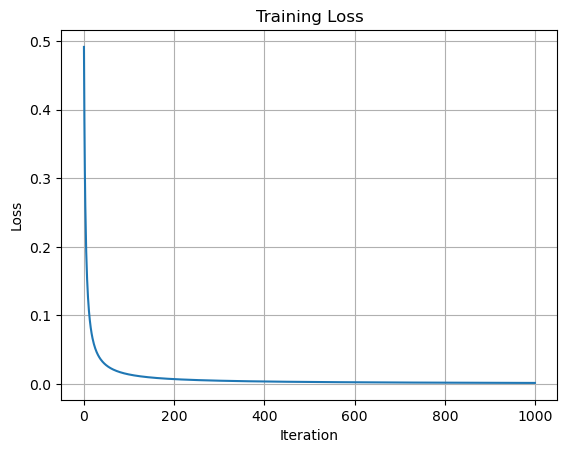

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 激活函数及其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Softmax 函数
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # 防止数值溢出
    return exp_x / np.sum(exp_x, axis=0)

# 交叉熵损失函数
def cross_entropy_loss(y, t):
    return -np.sum(t * np.log(y))

# 初始化参数
input_size = 2
hidden_size = 3
output_size = 2

# 随机初始化权重和偏置
W1 = np.random.randn(hidden_size, input_size)  # 隐藏层权重 (3x2)
b1 = np.random.randn(hidden_size, 1)          # 隐藏层偏置 (3x1)
W2 = np.random.randn(output_size, hidden_size) # 输出层权重 (2x3)
b2 = np.random.randn(output_size, 1)          # 输出层偏置 (2x1)

# 输入和目标值
x = np.array([[1], [2]])  # 输入 (2x1)
t = np.array([[1], [0]])  # 目标值 (one-hot 编码) (2x1)

# 前向传播
def forward(x, W1, b1, W2, b2):
    # 隐藏层
    z1 = np.dot(W1, x) + b1   # 加权输入 (3x1)
    h = sigmoid(z1)           # 激活输出 (3x1)

    # 输出层
    z2 = np.dot(W2, h) + b2   # 加权输入 (2x1)
    y = softmax(z2)           # 输出正则化 (2x1)

    return y, h, z1, z2

# 反向传播
def backward(x, t, y, h, z1, z2, W2):
    # 输出层梯度
    dL_dz2 = y - t            # 交叉熵损失对 z2 的梯度 (2x1)

    # W2 和 b2 的梯度
    dL_dW2 = np.dot(dL_dz2, h.T)  # (2x3)
    dL_db2 = dL_dz2           # (2x1)

    # 隐藏层梯度
    dL_dh = np.dot(W2.T, dL_dz2)  # (3x1)
    dL_dz1 = dL_dh * sigmoid_derivative(z1)  # (3x1)

    # W1 和 b1 的梯度
    dL_dW1 = np.dot(dL_dz1, x.T)  # (3x2)
    dL_db1 = dL_dz1           # (3x1)

    return dL_dW1, dL_db1, dL_dW2, dL_db2

# 训练参数
learning_rate = 0.1
num_iterations = 1000

# 记录损失
loss_history = []

# 训练过程
for i in range(num_iterations):
    # 前向传播
    y, h, z1, z2 = forward(x, W1, b1, W2, b2)

    # 计算损失
    loss = cross_entropy_loss(y, t)
    loss_history.append(loss)

    # 反向传播
    dL_dW1, dL_db1, dL_dW2, dL_db2 = backward(x, t, y, h, z1, z2, W2)

    # 更新参数
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

# 最终输出
print("\nFinal Output:")
print("y =", y)
print("Target =", t)

# 绘制损失曲线
plt.plot(loss_history)
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()